# **Instalando e importando bibliotecas**

In [1]:
pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=d2ddb43bb91ffc0da1dd42b7fda4bc3d8be4d2062d2e03f3261fe53af36397f4
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [2]:
from pydataset import data
dados = data('stackloss')
print(dados)

initiated datasets repo at: /root/.pydataset/
    Air.Flow  Water.Temp  Acid.Conc.  stack.loss
1         80          27          89          42
2         80          27          88          37
3         75          25          90          37
4         62          24          87          28
5         62          22          87          18
6         62          23          87          18
7         62          24          93          19
8         62          24          93          20
9         58          23          87          15
10        58          18          80          14
11        58          18          89          14
12        58          17          88          13
13        58          18          82          11
14        58          19          93          12
15        50          18          89           8
16        50          18          86           7
17        50          19          72           8
18        50          19          79           8
19        50          2

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **Variáveis: Water.Temp X Acid.Conc.**

In [4]:
correlacao = np.corrcoef(dados['Water.Temp'], dados['Acid.Conc.'])[0, 1]
print(f"Coeficiente de correlação: {correlacao:.2f}")

Coeficiente de correlação: 0.39


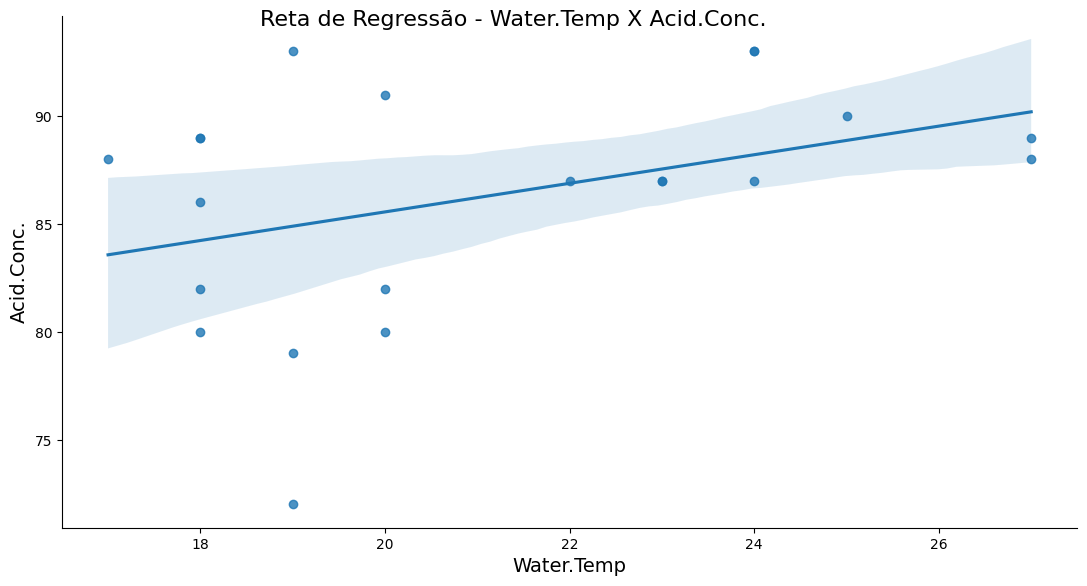

In [5]:
grafico = sns.lmplot(data=dados, x="Water.Temp", y="Acid.Conc.")
grafico.fig.set_size_inches(12, 6)
grafico.fig.suptitle('Reta de Regressão - Water.Temp X Acid.Conc.', fontsize=16)
grafico.set_xlabels(fontsize=14)
grafico.set_ylabels(fontsize=14)

In [6]:
modelo = ols('Q("Acid.Conc.") ~ Q("Water.Temp")', data=dados).fit()

In [7]:
resultados = modelo.summary()
print(resultados)

                            OLS Regression Results                            
Dep. Variable:        Q("Acid.Conc.")   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     3.428
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0797
Time:                        21:44:05   Log-Likelihood:                -62.797
No. Observations:                  21   AIC:                             129.6
Df Residuals:                      19   BIC:                             131.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          72.3043      7.632     

In [8]:
coeficientes = modelo.params
intercept = coeficientes['Intercept']
coeficiente_water_temp = coeficientes['Q("Water.Temp")']

expressao_reta = f"Acid.Conc. = {intercept:.2f} + {coeficiente_water_temp:.2f} * Water.Temp"
print("Expressão da Reta de Regressão:", expressao_reta)


Expressão da Reta de Regressão: Acid.Conc. = 72.30 + 0.66 * Water.Temp


In [ ]:
r_squared = modelo.rsquared
print(f"Coeficiente de Determinação (R²): {r_squared:.2f}")

Coeficiente de Determinação (R²): 0.15


# **Variáveis: Water.Temp X stack.loss**

In [ ]:
correlacao = np.corrcoef(dados['Water.Temp'], dados['stack.loss'])[0, 1]
print(f"Coeficiente de correlação: {correlacao:.2f}")

Coeficiente de correlação: 0.88


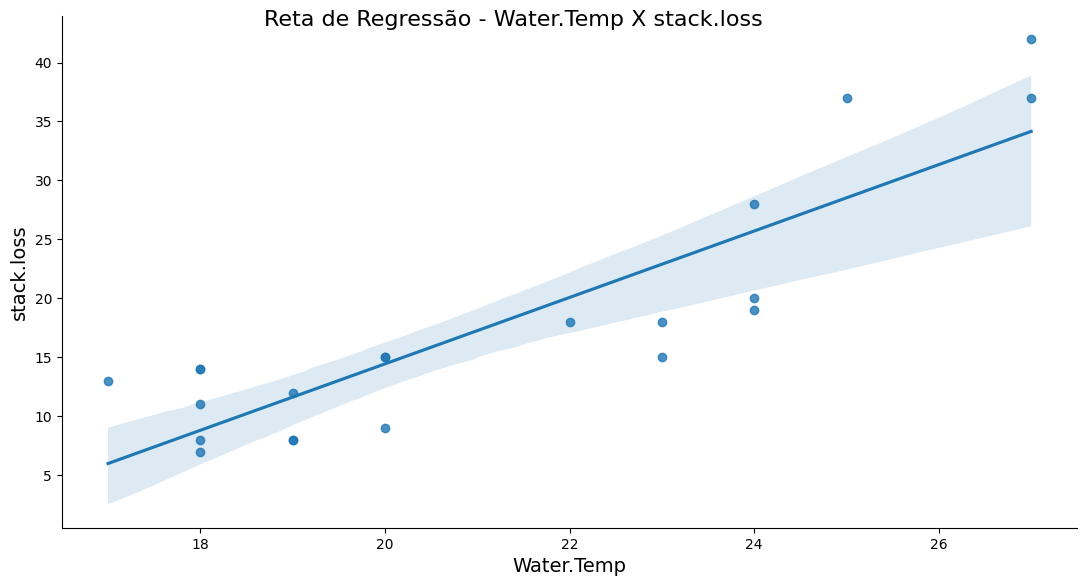

In [ ]:
grafico = sns.lmplot(data=dados, x="Water.Temp", y="stack.loss")
grafico.fig.set_size_inches(12, 6)
grafico.fig.suptitle('Reta de Regressão - Water.Temp X stack.loss', fontsize=16)
grafico.set_xlabels(fontsize=14)
grafico.set_ylabels(fontsize=14)

In [ ]:
modelo = ols('Q("stack.loss") ~ Q("Water.Temp")', data=dados).fit()

In [ ]:
resultados = modelo.summary()
print(resultados)

                            OLS Regression Results                            
Dep. Variable:        Q("stack.loss")   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     62.37
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.03e-07
Time:                        17:39:33   Log-Likelihood:                -62.724
No. Observations:                  21   AIC:                             129.4
Df Residuals:                      19   BIC:                             131.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -41.9109      7.606     

In [ ]:
coeficientes = modelo.params
intercept = coeficientes['Intercept']
coeficiente_water_temp = coeficientes['Q("Water.Temp")']

expressao_reta = f"stack.loss = {intercept:.2f} + {coeficiente_water_temp:.2f} * Water.Temp"
print("Expressão da Reta de Regressão:", expressao_reta)


Expressão da Reta de Regressão: stack.loss = -41.91 + 2.82 * Water.Temp


In [ ]:
r_squared = modelo.rsquared
print(f"Coeficiente de Determinação (R²): {r_squared:.2f}")

Coeficiente de Determinação (R²): 0.77


# **Variáveis: Acid.Conc. X stack.loss**

In [ ]:
correlacao = np.corrcoef(dados['Acid.Conc.'], dados['stack.loss'])[0, 1]
print(f"Coeficiente de correlação: {correlacao:.2f}")

Coeficiente de correlação: 0.40


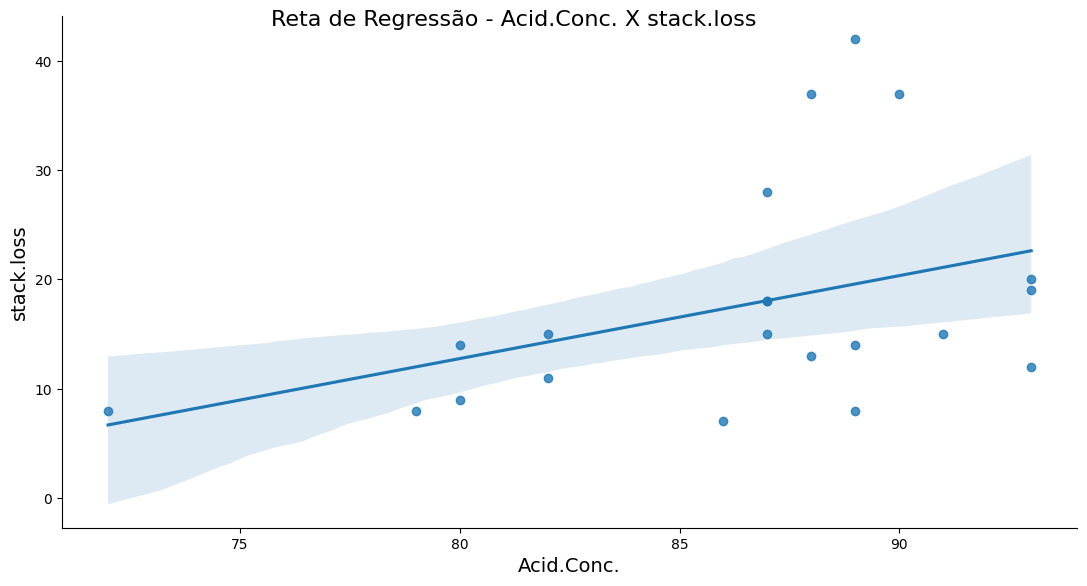

In [ ]:
grafico = sns.lmplot(data=dados, x="Acid.Conc.", y="stack.loss")
grafico.fig.set_size_inches(12, 6)
grafico.fig.suptitle('Reta de Regressão - Acid.Conc. X stack.loss', fontsize=16)
grafico.set_xlabels(fontsize=14)
grafico.set_ylabels(fontsize=14)

In [ ]:
modelo = ols('Q("stack.loss") ~ Q("Acid.Conc.")', data=dados).fit()

In [ ]:
resultados = modelo.summary()
print(resultados)

                            OLS Regression Results                            
Dep. Variable:        Q("stack.loss")   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     3.615
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0725
Time:                        17:44:39   Log-Likelihood:                -76.168
No. Observations:                  21   AIC:                             156.3
Df Residuals:                      19   BIC:                             158.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -47.9632     34.504     

In [ ]:
coeficientes = modelo.params
intercept = coeficientes['Intercept']
coeficiente_water_temp = coeficientes['Q("Acid.Conc.")']

expressao_reta = f"stack.loss = {intercept:.2f} + {coeficiente_water_temp:.2f} * Acid.Conc."
print("Expressão da Reta de Regressão:", expressao_reta)


Expressão da Reta de Regressão: stack.loss = -47.96 + 0.76 * Acid.Conc.


In [ ]:
r_squared = modelo.rsquared
print(f"Coeficiente de Determinação (R²): {r_squared:.2f}")

Coeficiente de Determinação (R²): 0.16


# Variáveis: Air.Flow X Water.Temp

In [ ]:
correlacao = np.corrcoef(dados['Air.Flow'], dados['Water.Temp'])[0, 1]
print(f"Coeficiente de correlação: {correlacao:.2f}")

Coeficiente de correlação: 0.78


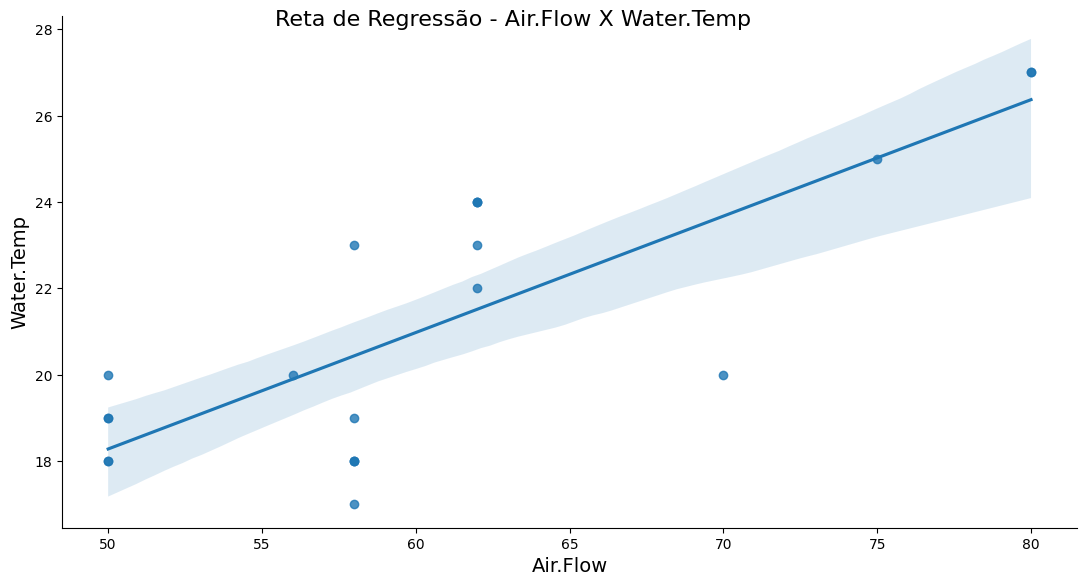

In [ ]:
grafico = sns.lmplot(data=dados, x="Air.Flow", y="Water.Temp")
grafico.fig.set_size_inches(12, 6)
grafico.fig.suptitle('Reta de Regressão - Air.Flow X Water.Temp', fontsize=16)
grafico.set_xlabels(fontsize=14)
grafico.set_ylabels(fontsize=14)

In [ ]:
modelo = ols('Q("Air.Flow") ~ Q("Water.Temp")', data=dados).fit()

In [ ]:
resultados = modelo.summary()
print(resultados)

                            OLS Regression Results                            
Dep. Variable:        Q("Water.Temp")   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     29.88
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.84e-05
Time:                        18:44:28   Log-Likelihood:                -43.531
No. Observations:                  21   AIC:                             91.06
Df Residuals:                      19   BIC:                             93.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8070      3.012      1.596

In [ ]:
coeficientes = modelo.params
intercept = coeficientes['Intercept']
coeficiente_water_temp = coeficientes['Q("Water.Temp")']

expressao_reta = f"Water.Temp = {intercept:.2f} + {coeficiente_water_temp:.2f} * Air.Flow"
print("Expressão da Reta de Regressão:", expressao_reta)

Expressão da Reta de Regressão: Water.Temp = 12.59 + 0.86 * Air.Flow


In [ ]:
r_squared = modelo.rsquared
print(f"Coeficiente de Determinação (R²): {r_squared:.2f}")

Coeficiente de Determinação (R²): 0.61


# Variáveis: Air.Flow X Acid.Conc.

In [ ]:
correlacao = np.corrcoef(dados['Air.Flow'], dados['Acid.Conc.'])[0, 1]
print(f"Coeficiente de correlação: {correlacao:.2f}")

Coeficiente de correlação: 0.50


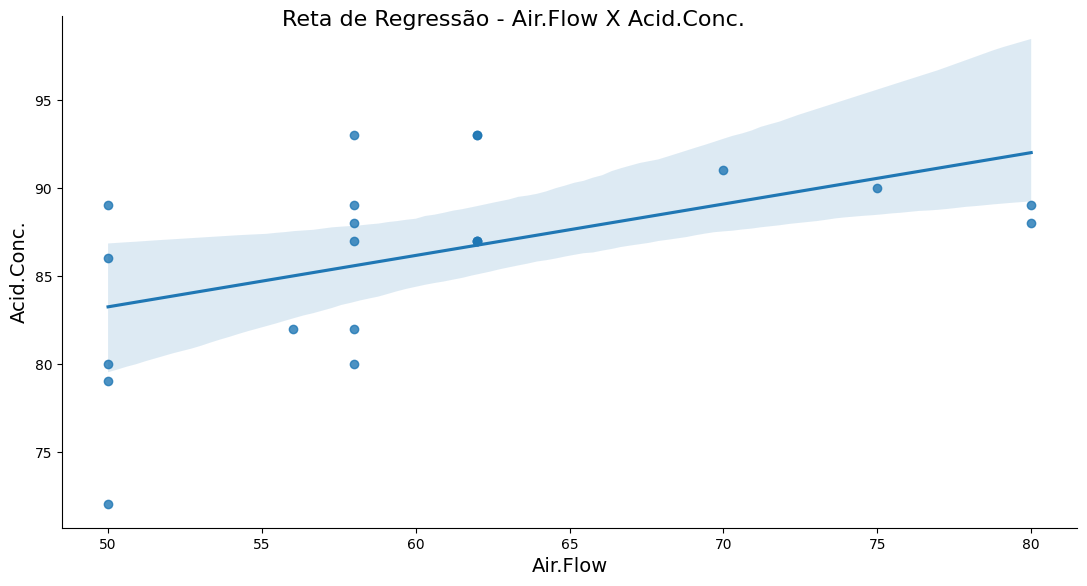

In [ ]:
grafico = sns.lmplot(data=dados, x="Air.Flow", y="Acid.Conc.")
grafico.fig.set_size_inches(12, 6)
grafico.fig.suptitle('Reta de Regressão - Air.Flow X Acid.Conc.', fontsize=16)
grafico.set_xlabels(fontsize=14)
grafico.set_ylabels(fontsize=14)

In [ ]:
modelo = ols('Q("Acid.Conc.") ~ Q("Air.Flow")', data=dados).fit()

In [ ]:
resultados = modelo.summary()
print(resultados)

                            OLS Regression Results                            
Dep. Variable:          Q("Air.Flow")   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     6.338
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0209
Time:                        18:42:08   Log-Likelihood:                -72.793
No. Observations:                  21   AIC:                             149.6
Df Residuals:                      19   BIC:                             151.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -13.4080     29.382     

In [ ]:
coeficientes = modelo.params
intercept = coeficientes['Intercept']
coeficiente_air_flow = coeficientes['Q("Air.Flow")']

expressao_reta = f"Acid.Conc = {intercept:.2f} + {coeficiente_air_flow:.2f} * Air.Flow"
print("Expressão da Reta de Regressão:", expressao_reta)

Expressão da Reta de Regressão: Acid.Conc = 68.62 + 0.29 * Air.Flow


In [ ]:
r_squared = modelo.rsquared
print(f"Coeficiente de Determinação (R²): {r_squared:.2f}")

Coeficiente de Determinação (R²): 0.25


# Variáveis: Air.Flow X stack.loss

In [ ]:
correlacao = np.corrcoef(dados['Air.Flow'], dados['stack.loss'])[0, 1]
print(f"Coeficiente de correlação: {correlacao:.2f}")

Coeficiente de correlação: 0.92


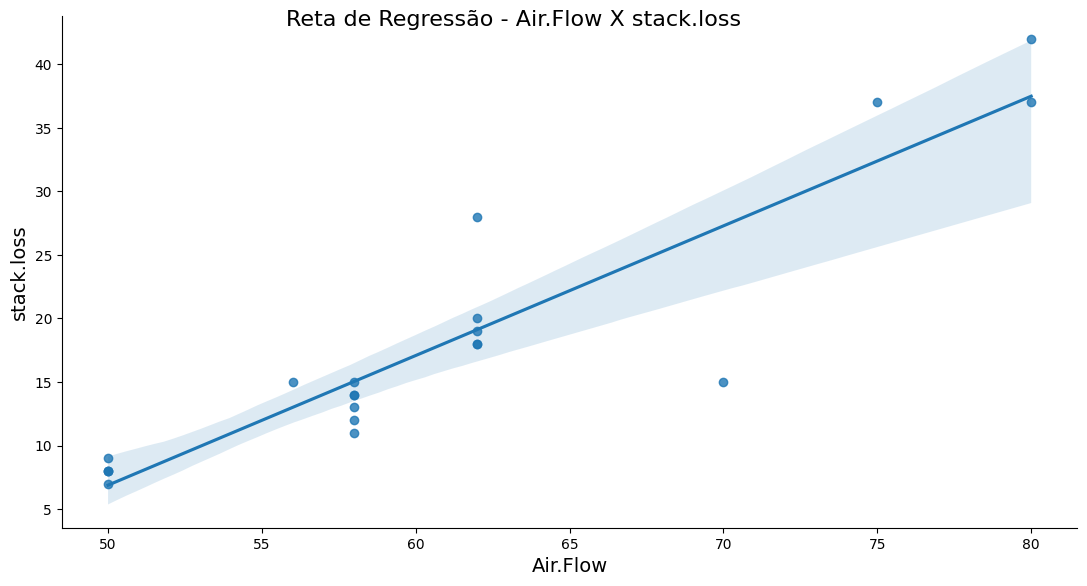

In [ ]:
grafico = sns.lmplot(data=dados, x="Air.Flow", y="stack.loss")
grafico.fig.set_size_inches(12, 6)
grafico.fig.suptitle('Reta de Regressão - Air.Flow X stack.loss', fontsize=16)
grafico.set_xlabels(fontsize=14)
grafico.set_ylabels(fontsize=14)

In [ ]:
modelo = ols('Q("Air.Flow") ~ Q("stack.loss")', data=dados).fit()

In [ ]:
resultados = modelo.summary()
print(resultados)

                            OLS Regression Results                            
Dep. Variable:          Q("Air.Flow")   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.77e-09
Time:                        18:52:42   Log-Likelihood:                -56.188
No. Observations:                  21   AIC:                             116.4
Df Residuals:                      19   BIC:                             118.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.9023      1.635     

In [ ]:
coeficientes = modelo.params
intercept = coeficientes['Intercept']
coeficiente_stack_loss = coeficientes['Q("stack.loss")']

expressao_reta = f"stack.loss = {intercept:.2f} + {coeficiente_stack_loss:.2f} * Air.Flow"
print("Expressão da Reta de Regressão:", expressao_reta)

Expressão da Reta de Regressão: stack.loss = 45.90 + 0.83 * Air.Flow


In [ ]:
r_squared = modelo.rsquared
print(f"Coeficiente de Determinação (R²): {r_squared:.2f}")

Coeficiente de Determinação (R²): 0.85
